In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# Load Data
train_load = np.load("utils\\train.npz")
test_load = np.load("utils\\test.npz")

x_train = train_load['x']
y_train = train_load['y']

x_test = test_load['x']
y_test = test_load['y']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Suprise


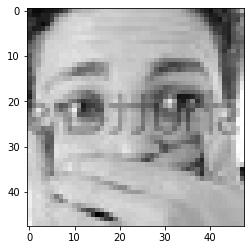

In [5]:
# Lets test the syncronization of label and image
dir_path = glob.glob("dataset" + "\*")

string_label = []
for string in dir_path:
    string_label.append(string.split("\\")[1])
    
plt.imshow(x_train[45200])
print(string_label[y_train[45200]])

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

In [25]:
import tensorflow as tf

def create_model():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(48, 48, 3)),
        tf.keras.layers.Conv2D(72, (3, 3), strides=(1, 1), activation='relu', kernel_initializer="he_uniform"),
        tf.keras.layers.Conv2D(64, (2, 2), activation='relu', kernel_initializer="he_uniform"),
        
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(72, (2, 2), activation='relu', kernel_initializer="he_uniform"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation="softmax")
    ])

In [26]:
model = create_model()

opt = tf.keras.optimizers.SGD(learning_rate=0.00001)
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 45, 45, 32)        4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 48)        6192      
_________________________________________________________________
dropout_7 (Dropout)          (None, 21, 21, 48)       

In [27]:
history = model.fit(
    x_train,
    y_train,
    steps_per_epoch=16,
    validation_steps=8,
    epochs=30,
    validation_data=(x_test, y_test)
)

Epoch 1/30
8/8 [==============================] - 71s 9s/step - loss: 2.2361 - accuracy: 0.1705 - val_loss: 1.9613 - val_accuracy: 0.1551
Epoch 2/30
8/8 [==============================] - 70s 9s/step - loss: 2.2082 - accuracy: 0.1740 - val_loss: 1.9189 - val_accuracy: 0.1617
Epoch 3/30
8/8 [==============================] - 69s 9s/step - loss: 2.1713 - accuracy: 0.1820 - val_loss: 1.8916 - val_accuracy: 0.1702
Epoch 4/30
8/8 [==============================] - 69s 9s/step - loss: 2.1596 - accuracy: 0.1813 - val_loss: 1.8722 - val_accuracy: 0.1899
Epoch 5/30
8/8 [==============================] - 69s 9s/step - loss: 2.1464 - accuracy: 0.1861 - val_loss: 1.8562 - val_accuracy: 0.2037
Epoch 6/30
8/8 [==============================] - 70s 9s/step - loss: 2.1330 - accuracy: 0.1887 - val_loss: 1.8432 - val_accuracy: 0.2122
Epoch 7/30
8/8 [==============================] - 70s 9s/step - loss: 2.1326 - accuracy: 0.1858 - val_loss: 1.8329 - val_accuracy: 0.2235
Epoch 8/30
8/8 [==================

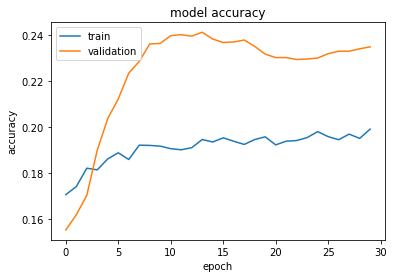

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

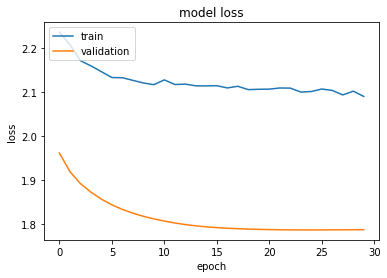

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
score = model.evaluate(x_test, y_test, verbose=2)
print("Akurasi : {} %".format(str(score[1] * 100)))

148/148 - 1s - loss: 1.7868 - accuracy: 0.2349
Akurasi : 23.49320948123932 %
